In [230]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

#VARIABLES UTILES

fs = 8000 #Hz
temps_total = 1.2 #secondes

nb_echantillons = int(fs * temps_total)

f0 = 195 #Hz

vecteur_temps = np.linspace(0, temps_total, nb_echantillons)

In [231]:
%matplotlib inline

In [232]:
#Sinusoide sur le vecteur temps
def sinusoide(amplitude, frequence, vecteur_temps):
    return amplitude * np.sin(2 * np.pi * frequence * vecteur_temps)

In [233]:
def rectangle(vecteur_temps, a, m = -1):

    rectangle = np.zeros((vecteur_temps.shape))

    if m == -1:
        m = np.take(vecteur_temps, vecteur_temps.size // 2)

    for i in range(vecteur_temps.shape[0]):
        if vecteur_temps[i] >= m - a / 2 and vecteur_temps[i] <= m + a / 2:
            rectangle[i] = 1;

    return rectangle

In [234]:
#Genere la suite de pics d'amplitudes aux frequences jusqu'a une certaine frequence.
#Prend en parametre (CN) la fonction qui genere la suite
def picsAvecSuite(C0, C1, CN, f0, freq_limite = 3000):
    nActuel = 1
    CActuel = C1

    pics = np.zeros(int(freq_limite / f0) + 1)
    pics[0] = C0

    while nActuel * f0 < freq_limite:
        pics[nActuel] = CActuel

        CActuel = CN(CActuel)

        nActuel += 1

    return pics



In [235]:
#Fonction pour la generation de la suite de pics
def CNDivise4(CNAvant):
    return CNAvant / 4
    
def CNDivise2(CNAvant):
    return CNAvant / 2

In [236]:
#Genere un vecteur signal (somme de sin) à partire d'une suite de pic d'amplitudes aux frequences
def signalFromPics(pics, f0, duree, fs):

    signal = np.zeros((int(duree * fs),))

    for i in range(pics.shape[0]):
        signal += sinusoide(pics[i], i * f0, np.linspace(0, duree, int(fs * duree)))

    return signal


In [263]:
#Applique le filtre sur les pics d'amplitude aux frequences en fonction des formants donnés
def modifierPicsFormants(formants, pics, f0, taille_bande = 100, valeur_mod = 4.1, withRatio = False):
    picsMod = pics.copy()

    for f in formants:
        for i in range(pics.shape[0]):
            if i * f0 >= f - taille_bande and i * f0 <= f + taille_bande:

                if withRatio:
                    picsMod[i] = valeur_mod * (pics.shape[0] - i) / pics.shape[0]
                else:
                    picsMod[i] = valeur_mod

    return picsMod


Text(0.5, 1.0, 'Sinusoide à f0 = 195')

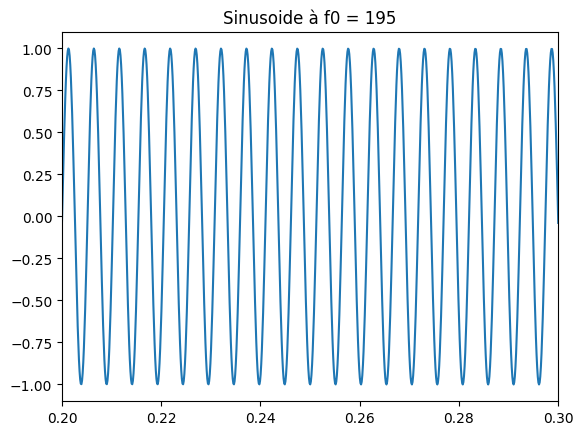

In [238]:
#Sinusoide à f0
sinF0 = sinusoide(1, f0, vecteur_temps)
axes = plt.subplot()
axes.plot(vecteur_temps, sinF0)
axes.set_xlim(0.2,0.3)
axes.set_title("Sinusoide à f0 = " + str(f0))

In [262]:
Audio(sinF0, rate=fs)

Text(0.5, 1.0, 'Amplitude aux frequences de reference')

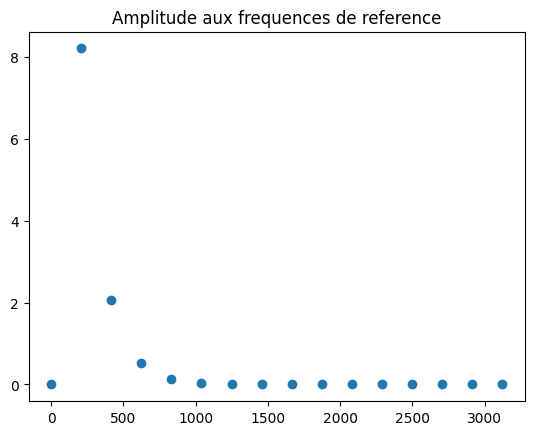

In [240]:
#Creation d'une suite de pics d'amplitude aux frequences
pics = picsAvecSuite(0, 8.2, CNDivise4, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, pics.shape[0], pics.shape[0]) * f0, pics)
axes.set_title("Amplitude aux frequences de reference")

Text(0.5, 1.0, 'Somme des sinusoides de la suite de pic "pur"')

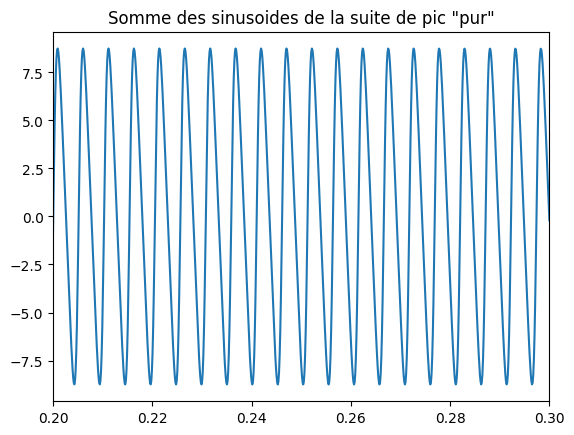

In [241]:
#Creation du signal correspondant
sig = signalFromPics(pics, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Somme des sinusoides de la suite de pic \"pur\"")

In [242]:
Audio(sig, rate=fs)

**Generation d'un U**

Text(0.5, 1.0, 'Amplitude aux frequences pour U')

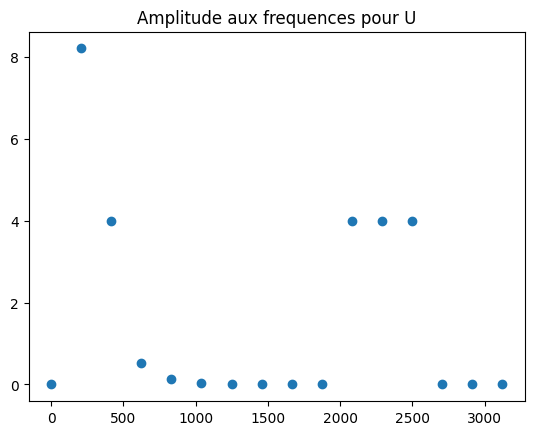

In [243]:
#Generation d'un U
formants = [330, 2050, 2420]

picsMod = modifierPicsFormants(formants, pics, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, picsMod.shape[0], picsMod.shape[0]) * f0, picsMod)
axes.set_title("Amplitude aux frequences pour U")

Text(0.5, 1.0, 'Signal pour U')

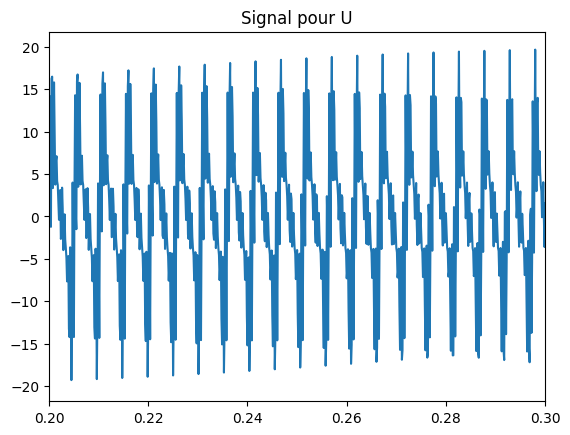

In [244]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Signal pour U")

In [245]:
Audio(sig, rate=fs)

**Generation d'un Euh**

Text(0.5, 1.0, 'Amplitude aux frequences pour Euh')

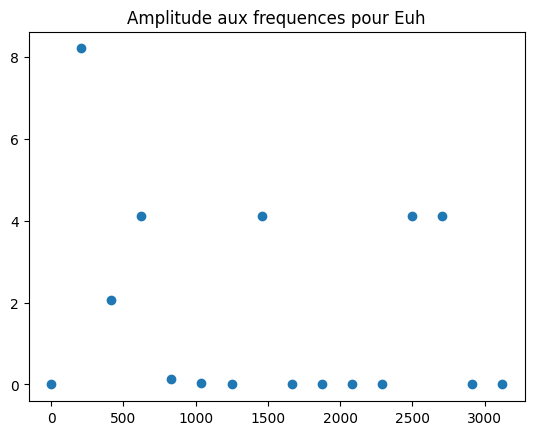

In [267]:
#Generation d'un Euh
formants = [560, 1440, 2440]

picsMod = modifierPicsFormants(formants, pics, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, picsMod.shape[0], picsMod.shape[0]) * f0, picsMod)
axes.set_title("Amplitude aux frequences pour Euh")

Text(0.5, 1.0, 'Signal pour Euh')

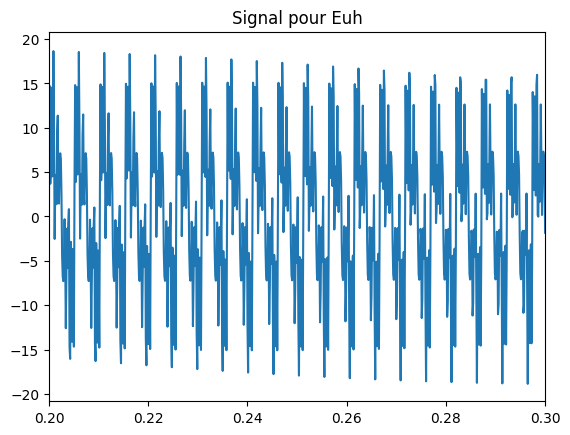

In [268]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Signal pour Euh")

In [269]:
Audio(sig, rate=fs)

**Generation d'un A**

Text(0.5, 1.0, 'Amplitude aux frequences pour A')

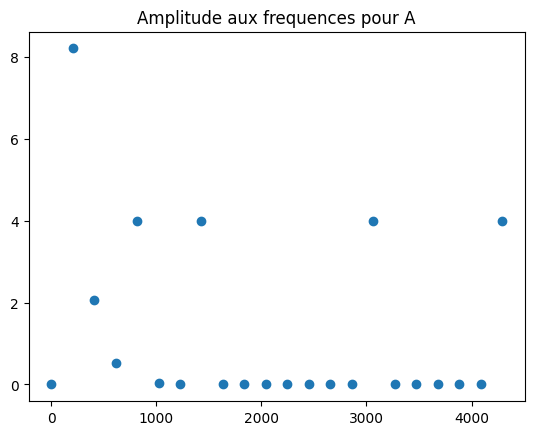

In [249]:
#Generation d'un A
pics = picsAvecSuite(0, 8.2, CNDivise4, f0, freq_limite=4200)

formants = [830, 1438, 2900, 4065]

picsMod = modifierPicsFormants(formants, pics, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, picsMod.shape[0], picsMod.shape[0]) * f0, picsMod)
axes.set_title("Amplitude aux frequences pour A")

Text(0.5, 1.0, 'Signal pour A')

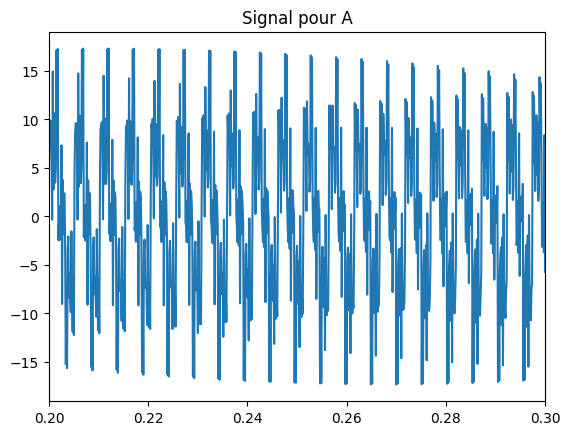

In [250]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Signal pour A")

In [251]:
Audio(sig, rate=fs)

**Generation du U suivi du Euh à 195Hz**

In [252]:
f0 = 195

Text(0.5, 1.0, 'Amplitude aux frequences de reference')

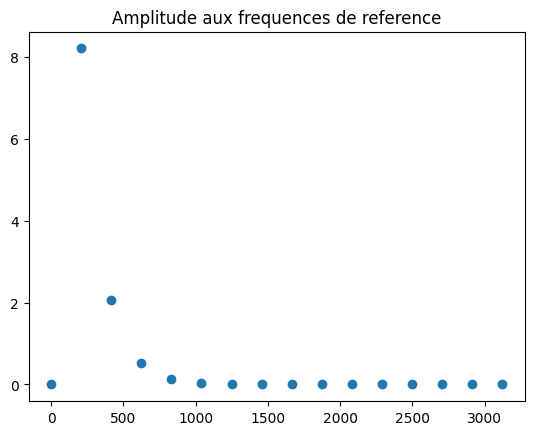

In [253]:
#Creation d'une suite de pics d'amplitude aux frequences
pics = picsAvecSuite(0, 8.2, CNDivise4, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, pics.shape[0], pics.shape[0]) * f0, pics)
axes.set_title("Amplitude aux frequences de reference")

Text(0.5, 1.0, 'Amplitude aux frequences pour U')

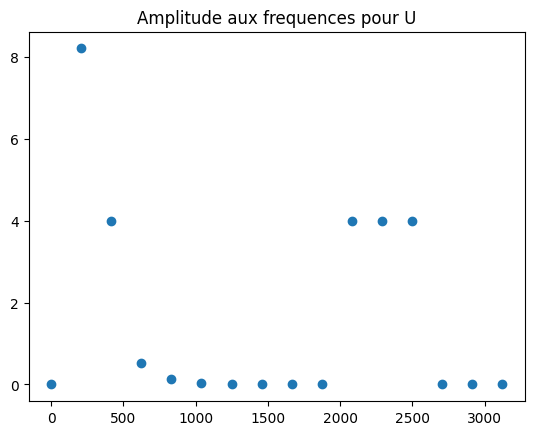

In [254]:
#Generation d'un U
formants = [330, 2050, 2420]

picsMod = modifierPicsFormants(formants, pics, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, picsMod.shape[0], picsMod.shape[0]) * f0, picsMod)
axes.set_title("Amplitude aux frequences pour U")

Text(0.5, 1.0, 'Signal pour U')

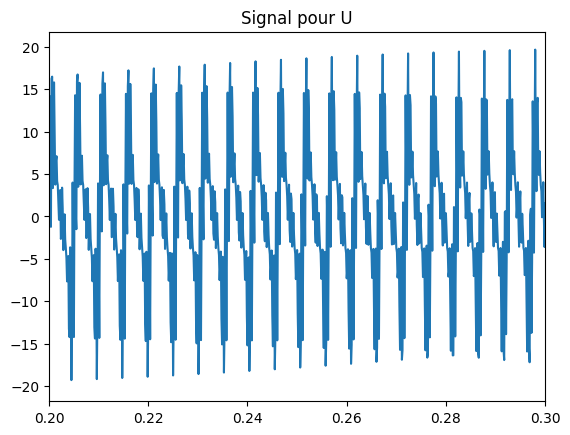

In [255]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Signal pour U")

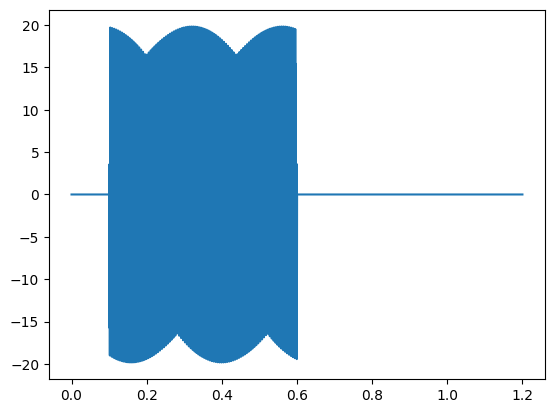

In [256]:
fenetre = rectangle(vecteur_temps, 0.5, m = 0.35)
partieU = fenetre * sig

plt.plot(vecteur_temps, partieU)

Text(0.5, 1.0, 'Amplitude aux frequences pour Euh')

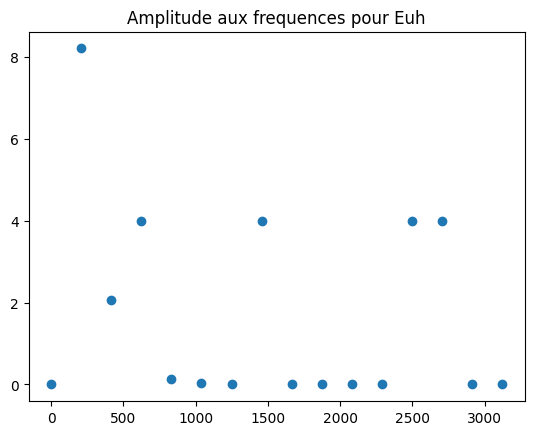

In [257]:
#Generation d'un Euh
formants = [560, 1440, 2440]

picsMod = modifierPicsFormants(formants, pics, f0)

axes = plt.subplot()
axes.scatter(np.linspace(0, picsMod.shape[0], picsMod.shape[0]) * f0, picsMod)
axes.set_title("Amplitude aux frequences pour Euh")

Text(0.5, 1.0, 'Signal pour Euh')

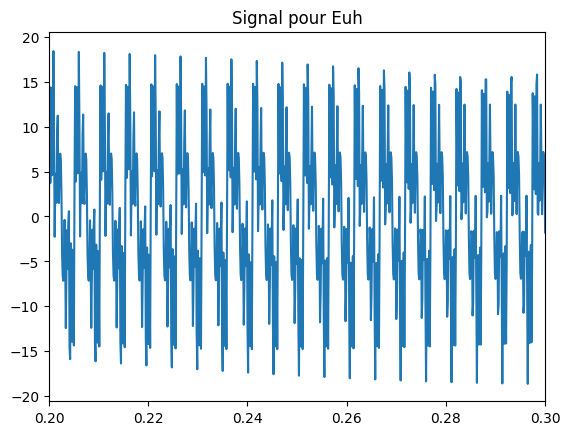

In [258]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.2, 0.3)
axes.plot(vecteur_temps, sig)
axes.set_title("Signal pour Euh")

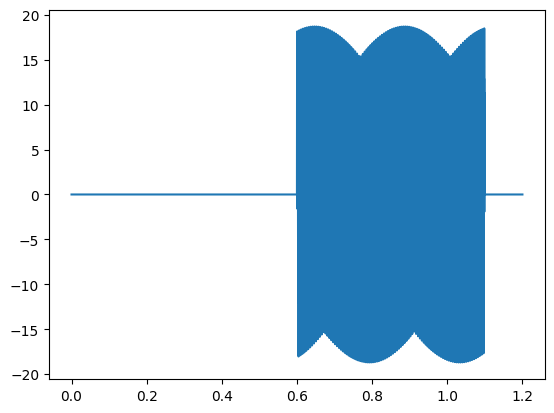

In [259]:
fenetre = rectangle(vecteur_temps, 0.5, m = 0.85)
partieEuh = fenetre * sig

plt.plot(vecteur_temps, partieEuh)

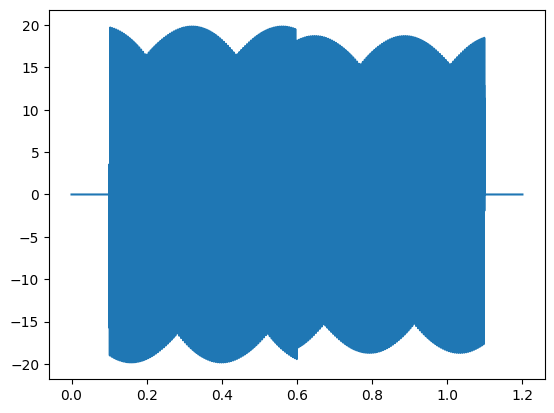

In [260]:
sigFinal = partieU + partieEuh

plt.plot(vecteur_temps, sigFinal)

In [261]:
Audio(sigFinal, rate=fs)